In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# #for Mariyum
from google.colab import drive
drive.mount('/content/drive')
% cd "/content/drive/MyDrive/Project5"

Mounted at /content/drive
/content/drive/MyDrive/Project5


In [ ]:
import pandas as pd
df_all = pd.read_csv('spam_ham_dataset.csv') #https://www.kaggle.com/venky73/spam-mails-dataset
df_all

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
# df_all['label'].hist()

In [ ]:
df_all['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


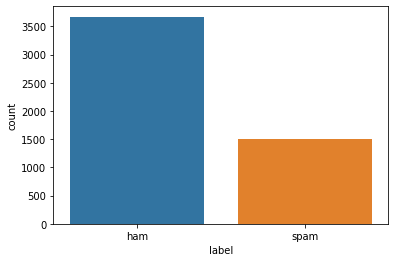

In [ ]:
sns.countplot(df_all['label'])

In [ ]:
# what percentage of the data is spam?
print("The percentage of spam is: ",df_all['label'].value_counts()['spam']/len(df_all) *100, "%")

The percentage of spam is:  28.98859021465867 %


## Clean up the text

In [ ]:
# remove "Subject:", "\n", "\r", 
df_all['text'] = df_all['text'].str.replace('Subject:', '')
df_all['text'] = df_all['text'].str.replace('\n', ' ')
df_all['text'] = df_all['text'].str.replace('\r', ' ')
df_all['text'] = df_all['text'].str.replace('\t', ' ')
df_all['text'] = df_all['text'].str.replace(':', ' ')
df_all['text'] = df_all['text'].str.replace(';', ' ')
df_all['text'] = df_all['text'].str.replace('/', ' ')
df_all['text'] = df_all['text'].str.replace('=', ' ')
df_all['text'] = df_all['text'].str.replace('?', ' ')

# remove all punctuation
df_all['text'] = df_all['text'].str.replace('!', ' ')
df_all['text'] = df_all['text'].str.replace('@', ' ')
df_all['text'] = df_all['text'].str.replace('#', ' ')
df_all['text'] = df_all['text'].str.replace('$', ' ')
df_all['text'] = df_all['text'].str.replace('%', ' ')
df_all['text'] = df_all['text'].str.replace('^', ' ')

# remove all numbers
df_all['text'] = df_all['text'].str.replace('1', ' ')
df_all['text'] = df_all['text'].str.replace('2', ' ')
df_all['text'] = df_all['text'].str.replace('3', ' ')
df_all['text'] = df_all['text'].str.replace('4', ' ')
df_all['text'] = df_all['text'].str.replace('5', ' ')
df_all['text'] = df_all['text'].str.replace('6', ' ')
df_all['text'] = df_all['text'].str.replace('7', ' ')
df_all['text'] = df_all['text'].str.replace('8', ' ')
df_all['text'] = df_all['text'].str.replace('9', ' ')
df_all['text'] = df_all['text'].str.replace('0', ' ')

# remove all special characters
df_all['text'] = df_all['text'].str.replace('`', ' ')
df_all['text'] = df_all['text'].str.replace('~', ' ')
df_all['text'] = df_all['text'].str.replace('!', ' ')
df_all['text'] = df_all['text'].str.replace('@', ' ')
df_all['text'] = df_all['text'].str.replace('#', ' ')
df_all['text'] = df_all['text'].str.replace('$', ' ')
df_all['text'] = df_all['text'].str.replace('%', ' ')
df_all['text'] = df_all['text'].str.replace('^', ' ')
df_all['text'] = df_all['text'].str.replace('&', ' ')
df_all['text'] = df_all['text'].str.replace('*', ' ')
df_all['text'] = df_all['text'].str.replace('(', ' ')
df_all['text'] = df_all['text'].str.replace(')', ' ')
df_all['text'] = df_all['text'].str.replace('-', ' ')
df_all['text'] = df_all['text'].str.replace('_', ' ')
df_all['text'] = df_all['text'].str.replace('=', ' ')
df_all['text'] = df_all['text'].str.replace('+', ' ')
df_all['text'] = df_all['text'].str.replace('[', ' ')
df_all['text'] = df_all['text'].str.replace(']', ' ')
df_all['text'] = df_all['text'].str.replace('{', ' ')
df_all['text'] = df_all['text'].str.replace('}', ' ')
df_all['text'] = df_all['text'].str.replace('|', ' ')
df_all['text'] = df_all['text'].str.replace('\\', ' ')
df_all['text'] = df_all['text'].str.replace(';', ' ')
df_all['text'] = df_all['text'].str.replace(':', ' ')
df_all['text'] = df_all['text'].str.replace('"', ' ')
df_all['text'] = df_all['text'].str.replace('\'', ' ')
df_all['text'] = df_all['text'].str.replace('<', ' ')
df_all['text'] = df_all['text'].str.replace('>', ' ')
df_all['text'] = df_all['text'].str.replace('/', ' ')
df_all['text'] = df_all['text'].str.replace('?', ' ')
df_all['text'] = df_all['text'].str.replace('.', ' ')
df_all['text'] = df_all['text'].str.replace(',', ' ' )
df_all['text'] = df_all['text'].str.replace(';', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: FutureWarning: The default value of regex will chang

In [ ]:
spam_df = df_all.groupby('label').get_group('ham')
spam_df['text'].head(1).item()

' enron methanol   meter             this is a follow up to the note i gave you on monday                preliminary  flow data provided by daren      please override pop   s daily volume   presently zero   to reflect daily  activity you can obtain from gas control    this change is needed asap for economics purposes  '

In [ ]:
spam_df['text']

0        enron methanol   meter             this is a ...
1        hpl nom for january             see attached ...
2        neon retreat  ho ho ho   we   re around to th...
4        re   indian springs  this deal is to book the...
5        ehronline web address change  this message is...
                              ...                        
5165     fw   crosstex energy   driscoll ranch        ...
5166     put the    on the ft  the transport volumes d...
5167                  and following noms  hpl can   t ...
5168     calpine daily gas nomination        julie   a...
5169     industrial worksheets for august      activit...
Name: text, Length: 3672, dtype: object

In [ ]:
spam_df = df_all.groupby('label').get_group('spam')
ham_df = df_all.groupby('label').get_group('ham')

In [ ]:
def count_words(df):
    # get all lower case words
    df['text'] = df['text'].str.lower()
    word_count = {}
    for row in df['text']:
        for word in row.split():
            if word not in word_count:
                word_count[word] = 1
            else:
                word_count[word] += 1
    return word_count

In [ ]:
spam_wards = count_words(spam_df)
ham_wards = count_words(ham_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# find common words
common_words = set(ham_wards.keys()) & set(spam_wards.keys())
common_words

# remove common words from spam_wards
spam_wards = {k:v for k, v in spam_wards.items() if k not in common_words}

# get the top 10 words
just_spam_words = sorted(spam_wards.items(), key=lambda x: x[1], reverse=True)

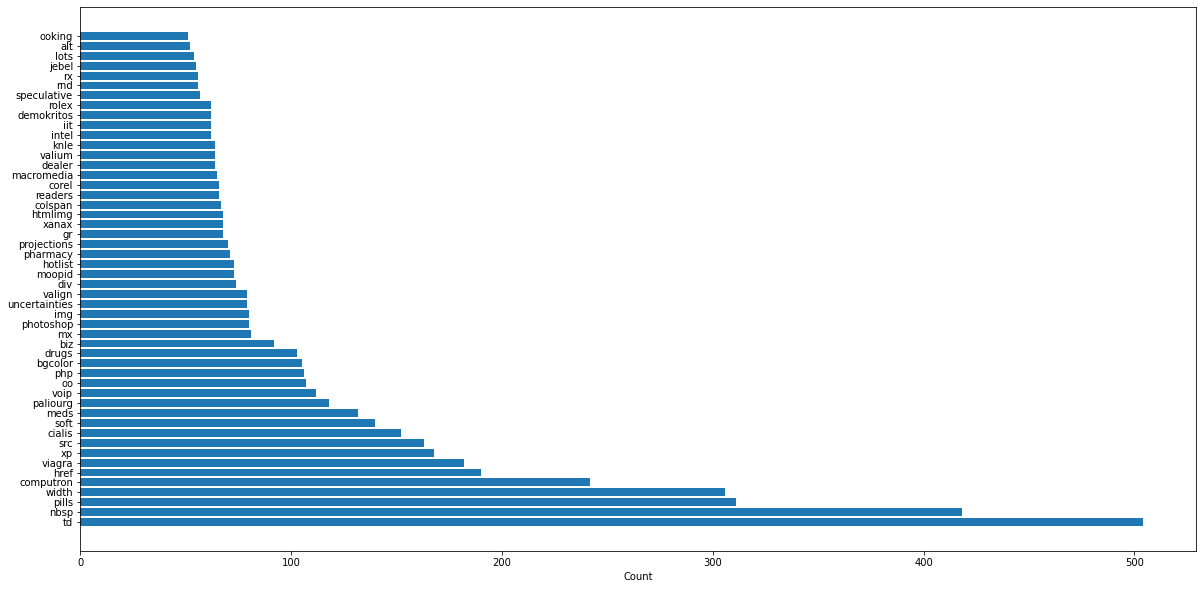

In [ ]:

# plot a histogram of the top 100 words
n =50
plt.figure(figsize=(20,10))

# horizonal bar plot
plt.barh(range(len(just_spam_words[:n])), [i[1] for i in just_spam_words[:n]], align='center')
plt.yticks(range(len(just_spam_words[:n])), [i[0] for i in just_spam_words[:n]])
plt.xlabel('Count')

plt.show()

In [ ]:
# open words files and read them into a list # https://github.com/dwyl/english-words/blob/master/words.txt
all_words = []
with open('words.txt', 'r') as f:
    for line in f:
        all_words.append(line.strip())

In [ ]:
# check if the words are in the dictionary

just_real_spam_words = []
for word in just_spam_words:
    # print(word[0])
    if word[0] in all_words:
        just_real_spam_words.append(word)

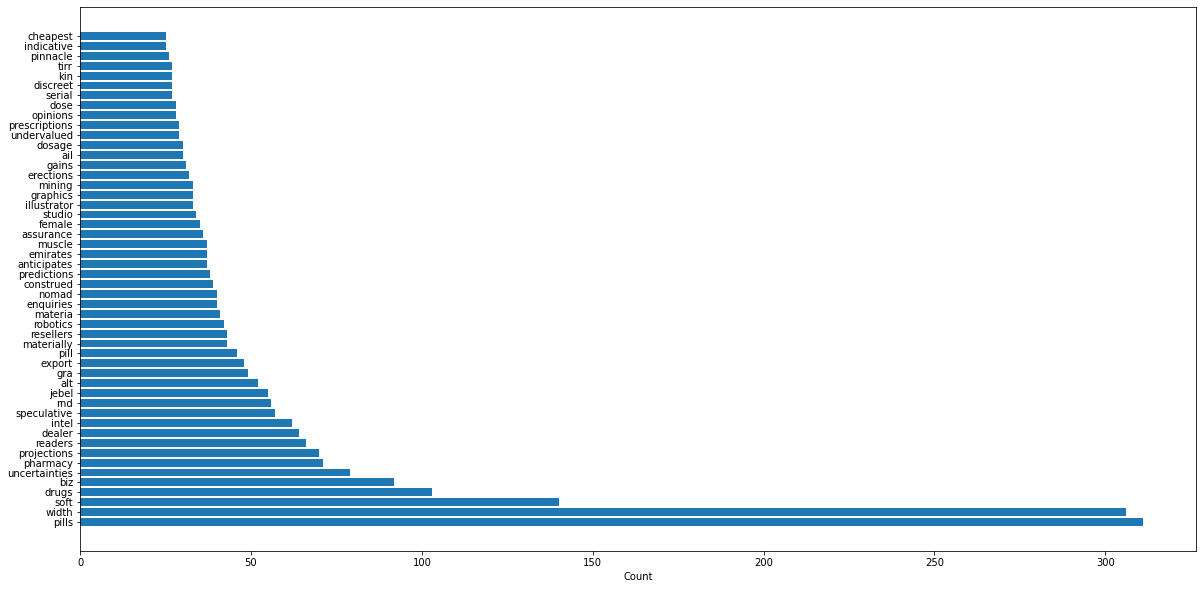

In [ ]:
# plot a histogram of the top 100 words
n =50
plt.figure(figsize=(20,10))

# horizonal bar plot
plt.barh(range(len(just_real_spam_words[:n])), [i[1] for i in just_real_spam_words[:n]], align='center')
plt.yticks(range(len(just_real_spam_words[:n])), [i[0] for i in just_real_spam_words[:n]])
plt.xlabel('Count')

plt.show()

In [ ]:
# df_all convert label to 0 and 1
clean_df_all = pd.DataFrame()
clean_df_all['label'] = df_all['label'].map({'spam': 1, 'ham': 0})
clean_df_all['text'] = df_all['text']

clean_df_all.head()

,label,text
0,0,enron methanol meter this is a ...
1,0,hpl nom for january see attached ...
2,0,neon retreat ho ho ho we re around to th...
3,1,photoshop windows office cheap main t...
4,0,re indian springs this deal is to book the...


In [ ]:
total_spam = clean_df_all.groupby('label').get_group(1)['label'].count()
total_ham = clean_df_all.groupby('label').get_group(0)['label'].count()
total_spam + total_ham == len(clean_df_all)

True

In [ ]:
# if one of the top 10 just_real_spam_words is in the text, then it is spam
# test the model
n = 20
spam_classified = 0
ham_classified = 0
for index, row in clean_df_all.iterrows():
    for word in just_real_spam_words[:n]:
        if word[0] in row['text']:
            if row['label'] == 1:
                spam_classified += 1
            break
    else:
        if row['label'] == 0:
            ham_classified += 1

print('The Spam Accuracy is: ', spam_classified/total_spam)
print('The Ham (aka.. not spam) Accuracy is: ', ham_classified/total_ham)
print('The total Accuracy is: ', (spam_classified+ham_classified)/len(clean_df_all))

The Spam Accuracy is:  0.5517011340893929
The Ham (aka.. not spam) Accuracy is:  0.8592047930283224
The total Accuracy is:  0.7700638174434346


# Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(clean_df_all['text']).toarray()

# help from https://www.kaggle.com/mukulkirti/naive-bayes-theorem
X_train, X_test, y_train, y_test = train_test_split(X, clean_df_all['label'], test_size=0.3, random_state=55)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
# X[3]

In [ ]:
# clean_df_all['text'][3]

' photoshop   windows   office   cheap   main trending  abasements darer prudently fortuitous undergone  lighthearted charm orinoco taster  railroad affluent pornographic cuvier  irvin parkhouse blameworthy chlorophyll  robed diagrammatic fogarty clears bayda  inconveniencing managing represented smartness hashish  academies shareholders unload badness  danielson pure caffein  spaniard chargeable levin  '

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
print('precision: ', p, '\nrecall: ', r, '\nfscore: ', f, '\nsupport: ', s)

precision:  [0.95843936 0.96782842] 
recall:  [0.98949212 0.8804878 ] 
fscore:  [0.97371822 0.92209451] 
support:  [1142  410]


# Multinomial Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train).predict(X_test)
y_pred = clf.predict(X_test)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
print('precision: ', p, '\nrecall: ', r, '\nfscore: ', f, '\nsupport: ', s)

precision:  [0.97922078 0.97229219] 
recall:  [0.99036778 0.94146341] 
fscore:  [0.98476273 0.95662949] 
support:  [1142  410]
